## *Commands*
1. Importe o dataset
2. Separe os dados de treino e treine
3. Aplique o One-Hot Encolding nas variáveis categóricas
4. Aplique a padronização dos dados StandardScaler
5. receba entradas dos usuários fazendo perguntas sobre cada features indicando o tipo de resposta(0 a 10)
6. Treine com todos os kernels e valores diferentes de C
7. Compare os resultados automaticamente
8. Responda ao usuário se ele terá ou não um segundo encontro


# Inputs

In [ ]:
def inputs():
    chat = int(input("Evaluate from 0 to 10, conversation time: "))
    laugh = int(input("Evaluate from 0 to 10, conversation time: "))
    common_points = int(input("Evaluate from 0 to 10, conversation time: "))
    shyness = int(input("Evaluate from 0 to 10, conversation time: "))
    msg_before = int(input("Evaluate from 0 to 10, conversation time: "))
    life_moment = int(input("Evaluate from 0 to 10, conversation time: "))
    conversa = int(input("Evaluate from 0 to 10, conversation time: "))
    laugh = int

In [1]:
# install
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [4]:
db = pd.read_csv("base_segundo_encontro.csv", encoding="latin1", sep=";")
db

,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida,segundo_encontro
0,112,16,6,0,45,8,Restaurante,Estressado,Sim
1,102,13,2,10,41,6,Bar,Estável,Sim
2,24,8,2,3,16,9,Café,Estável,Sim
3,116,7,4,0,8,4,Bar,Estressado,Sim
4,81,1,2,5,5,7,Parque,Estável,Não
...,...,...,...,...,...,...,...,...,...
995,129,19,6,0,25,8,Bar,Estável,Sim
996,68,17,5,6,12,3,Restaurante,Estável,Sim
997,137,5,3,7,7,7,Parque,Cansado,Sim
998,123,10,1,10,27,8,Bar,Estressado,Não


In [7]:
# db.describe()
# db.isnull().sum()
db.columns

Index(['tempo_conversa_min', 'risadas', 'pontos_comuns', 'nivel_timidez',
       'mensagens_antes', 'iniciativa_conversa', 'local_encontro',
       'momento_da_vida', 'segundo_encontro'],
      dtype='object')

<Axes: xlabel='segundo_encontro', ylabel='count'>

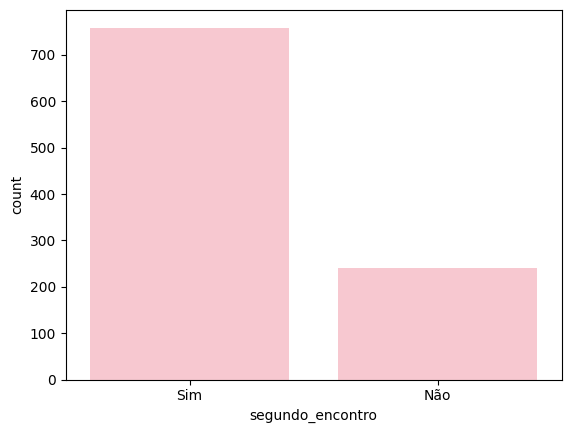

In [8]:
sns.countplot(x=db['segundo_encontro'], color="pink")

In [21]:
x = db.iloc[:, 0:8].values
y = db.iloc[0:8, 8].values

## One-Hot Encoder

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_encoder = ColumnTransformer(transformers=[
    ('OneHot1', OneHotEncoder(), [6]),
    ('OneHot2', OneHotEncoder(), [7])],
     
      remainder='passthrough')

In [24]:
x = onehot_encoder.fit_transform(x)
x[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (1, 153)>

In [25]:
x.shape

(1000, 153)

In [28]:
from sklearn.model_selection import train_test_split

